In [1]:
from google.colab import files
uploaded = files.upload()


Saving cable.png to cable.png


**Importing the main libraries like Opencv**

In [2]:
#import required library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline
from google.colab.patches import cv2_imshow

**READING THE IMAGE IN GRAYSCALE**

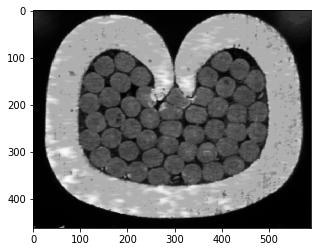

In [3]:
image = cv2.imread('cable.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

**Edge Filtering**

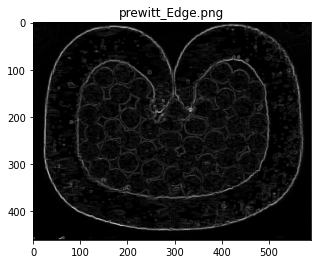

In [8]:
# Prewitt Operator
h, v = image.shape


#Creating Prewitt operator for finding gradient
horizontal = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
vertical = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

# define images with 0s
grad = np.zeros((h, v))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, v - 1):
        horizontalGrad = (horizontal[0, 0] * image[i - 1, j - 1]) + \
                         (horizontal[0, 1] * image[i - 1, j]) + \
                         (horizontal[0, 2] * image[i - 1, j + 1]) + \
                         (horizontal[1, 0] * image[i, j - 1]) + \
                         (horizontal[1, 1] * image[i, j]) + \
                         (horizontal[1, 2] * image[i, j + 1]) + \
                         (horizontal[2, 0] * image[i + 1, j - 1]) + \
                         (horizontal[2, 1] * image[i + 1, j]) + \
                         (horizontal[2, 2] * image[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * image[i - 1, j - 1]) + \
                       (vertical[0, 1] * image[i - 1, j]) + \
                       (vertical[0, 2] * image[i - 1, j + 1]) + \
                       (vertical[1, 0] * image[i, j - 1]) + \
                       (vertical[1, 1] * image[i, j]) + \
                       (vertical[1, 2] * image[i, j + 1]) + \
                       (vertical[2, 0] * image[i + 1, j - 1]) + \
                       (vertical[2, 1] * image[i + 1, j]) + \
                       (vertical[2, 2] * image[i + 1, j + 1])

# Edge Magnitude
mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
grad[i - 1, j - 1] = mag


plt.figure()
plt.title('prewitt_Edge.png')
plt.imsave('prewitt.png', grad, cmap='gray', format='png')
plt.imshow(grad, cmap='gray')
plt.show()

Result of Non-Maxima Suppression Image


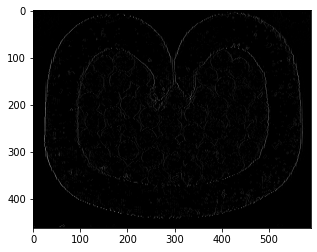

In [11]:
#image updated values after nonmaxima supression

a,b = grad.shape
newgrad = np.zeros((a,b))
new = np.zeros((a,b))

#Find gradient by convolving kernal with low pass filtered image
s1 = cv2.filter2D(image, cv2.CV_32F, horizontal)
s2 = cv2.filter2D(image, cv2.CV_32F, vertical)

#Calulating gradient and phase information from the gradient information
phase = cv2.phase(s1, s2, 1)


#Quantising the Phase values and storing the index of target pixels in xi and yi.
x1,y1 = np.where(((phase>0) & (phase<=22.5)) | ((phase>157.5) & (phase<=202.5)) | ((phase>337.5)&(phase<360)))
x2,y2 = np.where(((phase>22.5) & (phase<=67.5)) | ((phase>202.5) & (phase<=247.5)))
x3,y3 = np.where(((phase>67.5) & (phase<=112.5)) | ((phase>247.5) & (phase<=292.5)))
x4,y4 = np.where(((phase>112.5) & (phase<=157.5)) | ((phase>292.5) & (phase<=337.5)))

#Storing quantised values in a new image
new[x1,y1] = 0
new[x2,y2] = 45
new[x3,y3] = 90
new[x4,y4] = 135



#describing the Non-Maxima supression
for i in range(2,a-2):
	for j in range(2,b-2):
		if new[i,j] == 90:
			if((grad[i+1,j]<grad[i,j]) & (grad[i-1,j]<grad[i,j])):
				newgrad[i,j]=1

		elif new[i,j] == 45:
			if((grad[i+1,j-1]<grad[i,j]) & (grad[i-1,j+1]<grad[i,j])):
				newgrad[i,j]=1

		elif new[i,j] == 0:
			if((grad[i,j+1]<grad[i,j]) & (grad[i,j-1]<grad[i,j])):
				newgrad[i,j]=1

		elif new[i,j] == 135:
			if((grad[i+1,j+1]<grad[i,j]) & (grad[i-1,j-1]<grad[i,j])):
				newgrad[i,j]=1
#Refining the image by removing small extra regions and noise.
newgrad = np.multiply(newgrad,grad)

print("Result of Non-Maxima Suppression Image")
plt.imshow(newgrad,cmap='gray')

Result of the Non-maxima Supression